In [1]:
import numpy as np
import json
import math
train = np.load('training.npy')
train_labels = np.load('training-labels.npy')
np.random.seed(42)
CLASSES = 15
DIMENSIONS = 10000
LEARNINGRATE = 100
REGULARIZATION = .1
theta = 2 * np.random.rand(CLASSES, DIMENSIONS) - 1

In [2]:
"""helper functions"""
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def inference(theta, feats):
    """make a prediction given a vector of features"""
    eY = softmax(np.matmul(theta, feats))
    return eY
    
def gradient(inference, label, feats):
    """creates matrix for updating theta based off of gradient of softmax + cross/entropy"""
    inference = -1 * inference
    inference[int(label)-1] = 1 + inference[int(label)-1]
    update = np.matmul(inference.reshape(len(inference), 1), np.column_stack(feats))
    return LEARNINGRATE * update

def printLoss(inference, label):
    """print cross entropy loss, assuming actual y is one hot encoded"""
    loss = -math.log(inference[int(label)-1])
    print('Loss:', loss)
    
def loss(inference, label):
    """return cross entropy loss, assuming actual y is one hot encoded"""
    try:
        ans = -math.log(inference[int(label)-1])
        return ans
    except ValueError:
        return 9999

def evalLoss(theta, train, label):
    avgloss = 0
    for x in range(len(train)):
        los = loss(softmax(inference(theta, train[x])), label[x])
        avgloss += los
    return avgloss / len(train)

def evalAccuracy(theta, train, label):
    correct = 0
    for x in range(len(train)):
        pred = np.argmax(softmax(inference(theta, train[x])))
        if (pred == int(label[x])-1):
            correct += 1
    return (correct / len(train) * 100)

def evalMetrics(theta, train, labels):
    norm = np.linalg.norm(theta)
    loss = evalLoss(theta, train, labels)
    acc = evalAccuracy(theta, train, labels)
    print("Matrix Norm:", norm)
    print("Loss: ", end='')
    print(loss)
    print('Accuracy: ', str(acc)[:6] +'%')
    return (norm, loss, acc)
    
def qualitative(y, theta, train, labels):
    pred = softmax(inference(theta, train[y]))
    for i, x in enumerate(pred):
        print(i+1, x)
    print('prediction:', np.argmax(pred)+1)
    print('actual:', int(labels[y]))
    print('loss:', loss(pred, labels[y]))

In [3]:
def full_gradient_descent(theta, train, labels):
    N = len(train)
    updateM = np.zeros((CLASSES, DIMENSIONS))
    for x in range(len(train)):
        expY = inference(theta, train[x])
        update = gradient(expY, labels[x], train[x])
        if ( x % 1000 == 0):
            print('Step', str(x)+'/'+str(N)+'  ')
        update = np.add(update, updateM)
        
    update = np.add(update, -REGULARIZATION * theta)
    theta = np.add(theta, update)
    print("End ", end='')
    evalMetrics(theta, train, labels);
    return theta


In [4]:

def stochastic_descent(theta, train, labels):
    N = len(train)
    updateM = np.zeros((CLASSES, DIMENSIONS))
    for x in range(int(len(train)/10)):
        randSample = np.random.randint(0, train.shape[0])
        expY = inference(theta, train[randSample]) 
        update = gradient(expY, labels[randSample], train[randSample])
        updateM = np.add(update, updateM)
        
        
    updateM = np.add(updateM, -REGULARIZATION * theta)
    #regularization to prevent theta from getting too large
    theta = np.add(theta, updateM)
    return theta

        

In [5]:
def training(theta, train, train_labels):
    print("Beginning Metrics: ", end = '')
    evalMetrics(theta, train, train_labels)
    acc = []
    loss = []
    norm = []
    for x in range(20):
        print("Beginning epoch", x, end = '\n\n')
        theta = stochastic_descent(theta, train, train_labels)
        metrics = evalMetrics(theta, train, train_labels)
        norm.append(metrics[0])
        loss.append(metrics[1])
        acc.append(round(metrics[2], 3))
        print()
    return (norm, acc, loss, theta)

In [6]:
history = training(theta, train, train_labels)

Beginning Metrics: Matrix Norm: 223.5060331909246
Loss: 2.7080139098107967
Accuracy:  7.3333%
Beginning epoch 0

Matrix Norm: 279.0427061008818
Loss: 2.6395715563960023
Accuracy:  44.266%

Beginning epoch 1

Matrix Norm: 333.2582481604383
Loss: 2.5822265624695633
Accuracy:  59.033%

Beginning epoch 2

Matrix Norm: 375.44767462683615
Loss: 2.546567631084354
Accuracy:  67.833%

Beginning epoch 3

Matrix Norm: 411.58929045233293
Loss: 2.513655564202681
Accuracy:  74.1%

Beginning epoch 4

Matrix Norm: 441.4656417942082
Loss: 2.49097385077143
Accuracy:  77.100%

Beginning epoch 5

Matrix Norm: 465.80442696945806
Loss: 2.476941390468201
Accuracy:  82.399%

Beginning epoch 6

Matrix Norm: 485.6523033915317
Loss: 2.4596159572418856
Accuracy:  83.133%

Beginning epoch 7

Matrix Norm: 501.9833699961628
Loss: 2.4474987131197286
Accuracy:  82.166%

Beginning epoch 8

Matrix Norm: 516.708069614239
Loss: 2.433863438213149
Accuracy:  83.133%

Beginning epoch 9

Matrix Norm: 528.5545048429384
Loss: 2

In [7]:
norm = history[0]
accuracy = history[1]
losss = history[2]
theta = history[3]
timesteps = np.arange(1, 21)

In [8]:
import matplotlib.pyplot as plt
def pltwrt(data, label): #plot with respect to timestep
    plt.plot(timesteps, data, color = '#663399')
    plt.xlabel('epochs')
    plt.ylabel(label)
    plt.xticks(timesteps)
    plt.show()

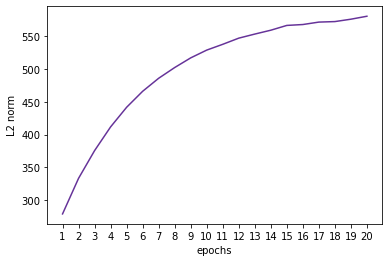

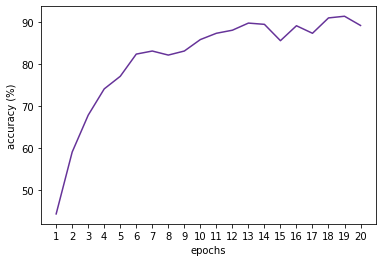

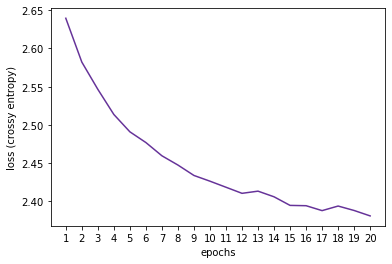

In [9]:
pltwrt(norm, 'L2 norm')
pltwrt(accuracy, 'accuracy (%)')
pltwrt(losss, "loss (crossy entropy)")

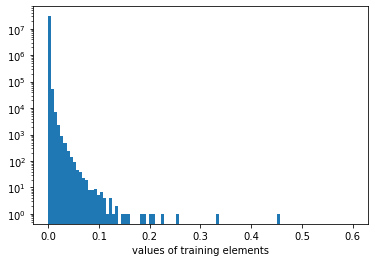

In [10]:
x = np.reshape(train, train.shape[0]*train.shape[1])
plt.hist(x, bins = 100, range=[0, .6])
plt.xlabel('values of training elements')
plt.yscale('log')
plt.show()

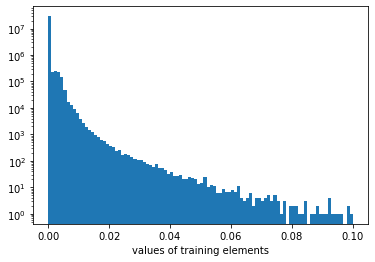

In [11]:
x = np.reshape(train, train.shape[0]*train.shape[1])
plt.hist(x, bins = 100, range=[0, .1])
plt.xlabel('values of training elements')
plt.yscale('log')
plt.show()

In [28]:
test = np.load('testing.npy')
test_labels = np.load('testing-labels.npy')
evalAccuracy(theta, test, test_labels)

82.8